In [1]:
%env ARTS_BUILD_PATH=/home/simonpf/build/arts_fast
from setup import *
from joint_flight.data.in_situ import cip

env: ARTS_BUILD_PATH=/home/simonpf/build/arts_fast
No environment variable JOINT_FLIGHT_PATH found. Will look in ../joint_flight/..  for the joint flight data.


## Shape data

In [37]:
from scipy.interpolate import RegularGridInterpolator
from typhon.arts.xml import load

sd_meta = load("../data/scattering_data/LargePlateAggregate.meta.xml")
d_e_lpa = [s.diameter_volume_equ for s in sd_meta]
d_max_lpa = [s.diameter_max for s in sd_meta]

sd_meta = load("../data/scattering_data/8-ColumnAggregate.meta.xml")
d_e_8ca = [s.diameter_volume_equ for s in sd_meta]
d_max_8ca = [s.diameter_max for s in sd_meta]

## Results

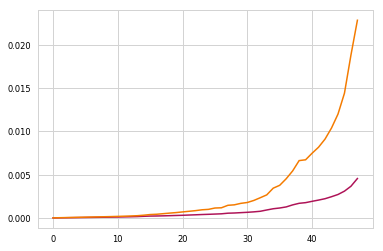

In [38]:
plt.plot(d_e)
plt.plot(d_max)

In [39]:
from joint_flight.results import results
from joint_flight.data.in_situ import faam
from joint_flight.data import hamp
from parts.scattering.psd.data.psd_data import PSDData, D_max
from parts.scattering.psd import D14MN

# Ice
md_ice = results["combined"]["ice_md"]
n0_ice = results["combined"]["ice_n0"]
z      = np.linspace(0, 13e3, 66)
f      = RegularGridInterpolator((hamp.d[:-1], z), md_ice)
md_ice = f((cip.d, cip.z))
f      = RegularGridInterpolator((hamp.d[:-1], z), n0_ice)
n0_ice = f((cip.d, cip.z))

d14_ice      = D14MN(-1, 3, rho = 917.0, mass_density = md_ice, intercept_parameter = n0_ice)
psd_data_ice = d14_ice.evaluate(np.array(d_e_8ca))

# Snow
md_snow = results["combined"]["snow_md"]
n0_snow = results["combined"]["snow_n0"]
z      = np.linspace(0, 13e3, 66)
f      = RegularGridInterpolator((hamp.d[:-1], z), md_snow)
md_snow = f((cip.d, cip.z))
f      = RegularGridInterpolator((hamp.d[:-1], z), n0_snow)
n0_snow = f((cip.d, cip.z))

d14_snow      = D14MN(2.654, 0.75, rho = 917.0, mass_density = md_snow, intercept_parameter = n0_snow)
psd_data_snow = d14_snow.evaluate(np.array(d_e_lpa))

In [36]:
import seaborn as sns
sns.reset_orig()

def plot_psds(x, y, ax = None):
    if ax is None:
        ax = plt.gca()
        
    n   = y.shape[1]
    pal = sns.cubehelix_palette(n, rot=-.25, light=.7)
    
    dy = 7 / 2
    for i in range(n - 1, -1, -1):
        y_0 = dy * i
        9
        y_1 = np.maximum(np.log10(y[:, i]), - 5) + dy * i
        ax.plot(x, y_1, c = "white")
        ax.fill_between(x, y_1, y_0 - 5, color = pal[i])
        ax.plot(x, (y_0 - 5) * np.ones(x.size), c = pal[i])
        
    ax.set_xscale("log")    
    ax.grid("off")

/home/simonpf/build/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [41]:
cip.y_avg

array([[1.56627197e+02, 5.04452942e+02, 1.93905045e+02, ...,
        1.15848112e+01, 7.00129151e-01, 2.24676564e-01],
       [7.02875366e+01, 2.44504623e+02, 8.12073364e+01, ...,
        3.26889110e+00, 3.46251786e-01, 1.10118978e-01],
       [2.70200253e+01, 1.01773949e+02, 3.52468109e+01, ...,
        2.95383900e-01, 2.53784396e-02, 4.95596975e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424:

(0.001, 1.0)

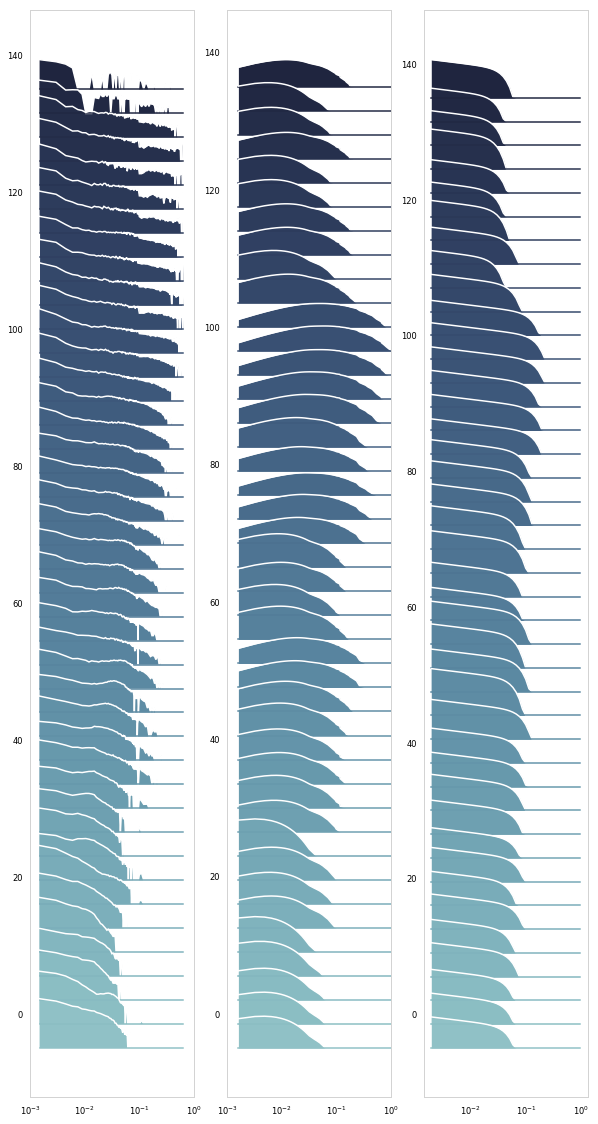

In [40]:
f, axs = plt.subplots(1, 3, figsize = (10, 20))

plot_psds(cip.x, cip.y_avg, ax = axs[0])
plot_psds(np.array(d_max_lpa) / 1e-2, psd_data_snow.data.T * 1e-8, ax = axs[1])
plot_psds(np.array(d_max_8ca) / 1e-2, psd_data_ice.data.T * 1e-8, ax = axs[2])

axs[0].set_xlim([1e-3, 1e0])
axs[1].set_xlim([1e-3, 1e0])

#ax.set_yscale("log")    
#ax.grid("off")

/home/simon/src/matplotlib/lib/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


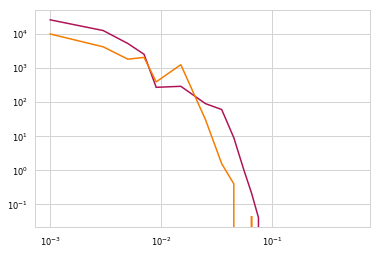

In [151]:
plt.plot(cip.x_r, cip.y_r[:, 1])
plt.plot(cip.x_r, cip.y_r[:, 2])
plt.yscale("log")
plt.xscale("log")